In [6]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [7]:
# Load and preprocess training data
train_df = pd.read_csv('../Datasets/RefSeq.csv')  # Replace with your actual training file path
desired_columns = ['fr1', 'fr2', 'fr3', 'fr4', 'fr5', 'fr6', 'fr7', 'fr8', 'fr9', 'fr10', 'fr11', 'fr12', 'fr13', 'fr14', 'fr15', 'fr16']

# Ensure desired columns are in the dataframe
for col in desired_columns:
    if col not in train_df.columns:
        raise ValueError(f"Column '{col}' not found in training DataFrame.")

X_train = train_df[desired_columns]
y_train = train_df['class']

# Scale features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [8]:
# Load and preprocess testing data
test_df = pd.read_csv('../Datasets/CompSeq.csv')  # Replace with your actual testing file path

for col in desired_columns:
    if col not in test_df.columns:
        raise ValueError(f"Column '{col}' not found in testing DataFrame.")

X_test = test_df[desired_columns]
y_test = test_df['class']

# Scale features
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [9]:
# Train the Random Forest model
final_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
final_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
start_train = time.time()
# Evaluate the model on training data
y_train_pred = final_model.predict(X_train)
end_train = time.time()
print("Training Evaluation Time: {0:.5} seconds \n".format(end_train-start_train))

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
train_recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=0)
train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=0)

train_eval = {
    'accuracy': train_accuracy,
    'precision': train_precision,
    'recall': train_recall,
    'f1': train_f1
}

start = time.time()
# Evaluate the model on testing data
y_test_pred = final_model.predict(X_test)
end = time.time()
print("Testing Evaluation Time: {0:.5} seconds \n".format(end-start))

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)


test_eval = {
    'accuracy': test_accuracy,
    'precision': test_precision,
    'recall': test_recall,
    'f1': test_f1
}

Training Evaluation Time: 289.05 seconds 

Testing Evaluation Time: 115.49 seconds 



In [11]:
# Print evaluation metrics
print("\nFinal Model Evaluation (Train Data):")
print(f"Accuracy: {train_eval['accuracy']:.4f}")
print(f"Precision: {train_eval['precision']:.4f}")
print(f"Recall: {train_eval['recall']:.4f}")
print(f"F1 Score: {train_eval['f1']:.4f}")

print("\nFinal Model Evaluation (Test Data):")
print(f"Accuracy: {test_eval['accuracy']:.4f}")
print(f"Precision: {test_eval['precision']:.4f}")
print(f"Recall: {test_eval['recall']:.4f}")
print(f"F1 Score: {test_eval['f1']:.4f}")


Final Model Evaluation (Train Data):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Final Model Evaluation (Test Data):
Accuracy: 0.9880
Precision: 0.9881
Recall: 0.9880
F1 Score: 0.9880



Feature Importance Results:
Most important feature: fr9 (Importance: 0.0931)
Least important feature: fr12 (Importance: 0.0354)


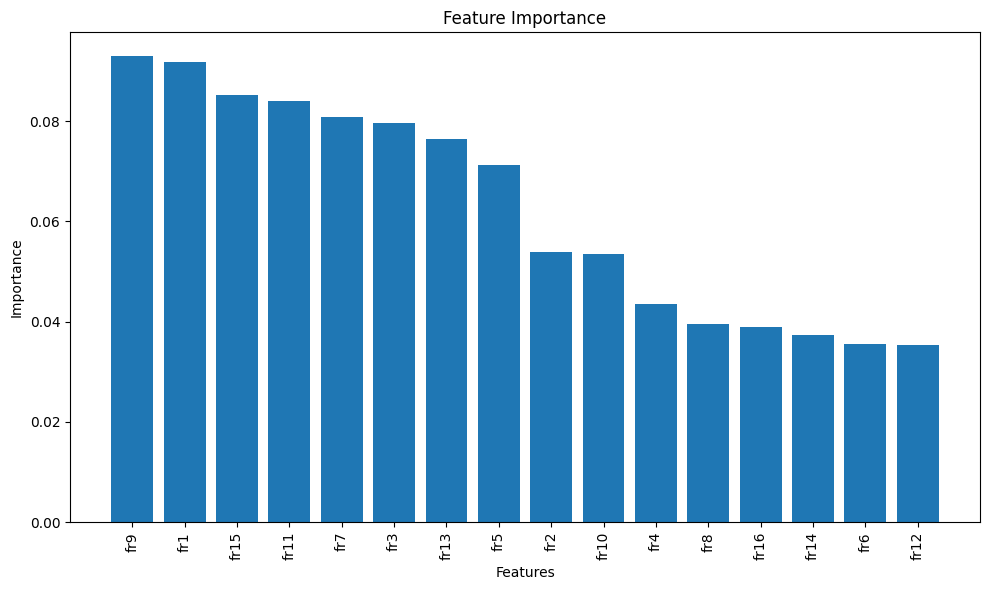

In [12]:
# Plot feature importance
importances = final_model.feature_importances_
indices = np.argsort(importances)[::-1]
most_important = X_train.columns[indices[0]]
least_important = X_train.columns[indices[-1]]

print("\nFeature Importance Results:")
print(f"Most important feature: {most_important} (Importance: {importances[indices[0]]:.4f})")
print(f"Least important feature: {least_important} (Importance: {importances[indices[-1]]:.4f})")

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [X_train.columns[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

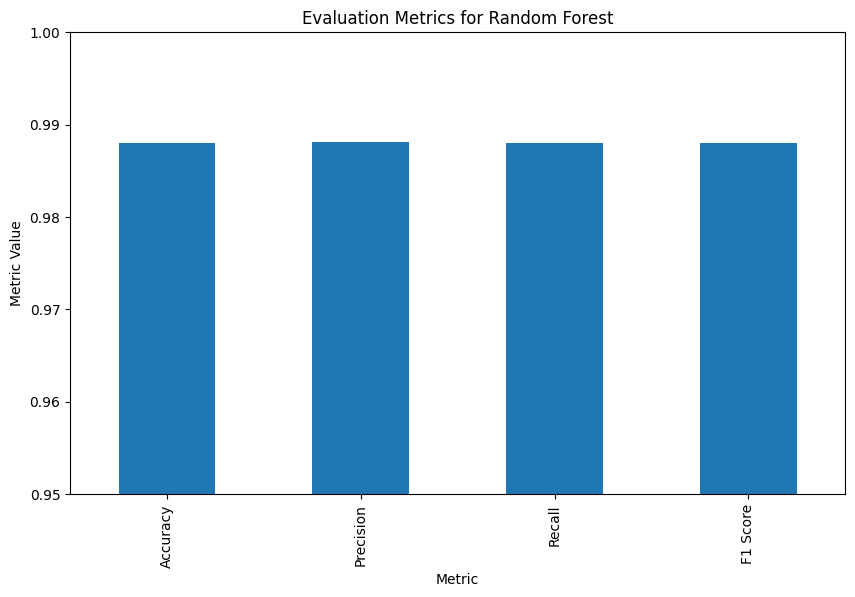

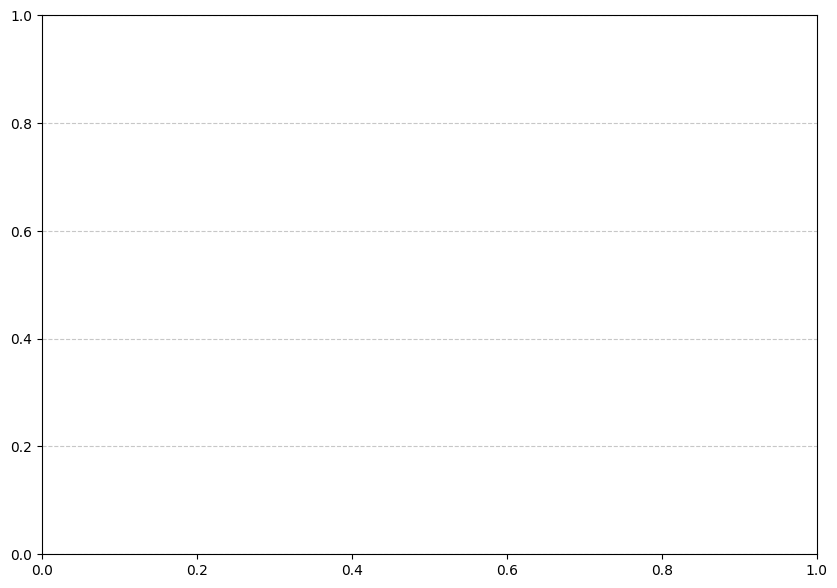

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '../Metrics_Files/Random_Forest_Metrics.csv'  # Replace with your actual file path
metrics_df = pd.read_csv(file_path)

# Set the metric as the index for better visualization
metrics_df.set_index('Metric', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(metrics_df))  # Use seaborn's husl palette

# Create a bar plot
metrics_df['Value'].plot(kind='bar')

# Customizing the plot
plt.title('Evaluation Metrics for Random Forest')
plt.ylabel('Metric Value')
plt.ylim(0.95, 1)  # Set the y-axis limit
plt.figure(figsize=(10, 7))
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add grid for better readability
plt.show()